In [1]:
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_case2.csv', ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

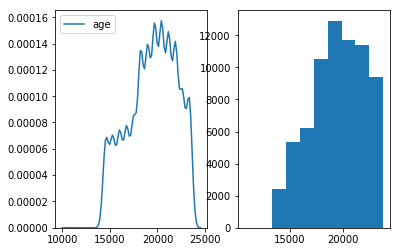

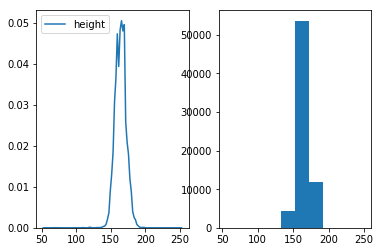

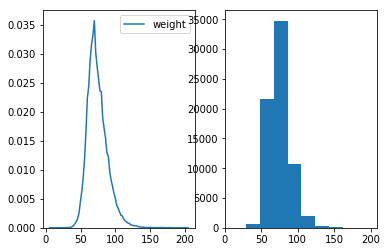

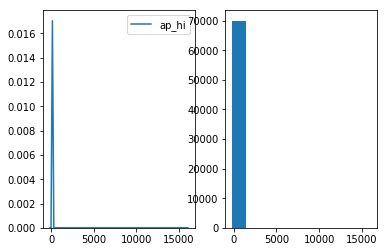

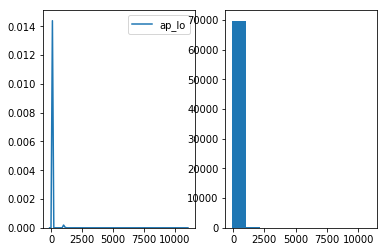

In [7]:
for name in features:
  plt.subplot(1,2,1)
  sns.kdeplot(df[name])
  plt.subplot(1,2,2)
  plt.hist(df[name])
  plt.show()

Как видим выше, в данных по давлению содержатся ошибки, давайте с этим разберемся

In [8]:
df.loc[(df['ap_hi']>300) & (df['ap_hi']<3000)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1


In [9]:
df.loc[(df['ap_hi']>300) & (df['ap_hi']<3000), 'ap_hi'] = df.loc[(df['ap_hi']>300) & (df['ap_hi']<3000), 'ap_hi'] // 10

In [10]:
df.loc[df['ap_hi']>=3000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1
40852,58374,17438,1,169,70.0,16020,80,1,1,0,0,0,1
46912,66998,16910,2,180,78.0,14020,90,1,1,0,0,1,1
47253,67502,19731,1,160,65.0,14020,90,1,1,0,0,1,0
51438,73356,18784,2,168,65.0,11020,80,1,1,0,0,1,1
55459,79116,18307,1,152,76.0,13010,80,2,2,0,0,1,1
55847,79679,23182,1,161,105.0,13010,80,1,1,0,0,0,0


In [11]:
df.loc[df['ap_hi']>=3000, 'ap_hi'] = df.loc[df['ap_hi']>=3000, 'ap_hi'] // 100

In [12]:
df.loc[df['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [13]:
df.loc[df['ap_hi']<0, 'ap_hi'] = df.loc[df['ap_hi']<0, 'ap_hi'] * -1

In [14]:
df.loc[df['ap_hi']<50]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
1600,2260,19201,1,165,66.0,12,80,1,1,0,0,1,0
1627,2301,22591,1,165,71.0,14,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,21217,1,160,59.0,12,80,1,1,0,0,1,0
68742,98213,18755,1,158,74.0,14,90,1,1,0,0,1,1
68998,98568,19107,1,154,77.0,14,90,1,1,0,0,1,0
69137,98743,15442,2,176,65.0,12,80,1,1,0,0,1,0


In [15]:
df.loc[df['ap_hi']<50, 'ap_hi'] = df.loc[df['ap_hi']<50, 'ap_hi'] * 10

In [16]:
df.loc[(df['ap_hi']<50) | (df['ap_hi']>250)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
8757,12494,16905,2,163,63.0,10,2088,1,1,1,0,1,0
40330,57646,20322,1,162,50.0,300,0,1,1,0,0,1,0
40831,58349,19806,1,162,67.0,400,80,1,3,0,0,1,1
42334,60477,18716,1,171,80.0,10,1088,1,1,0,0,1,1


In [17]:
df.iloc[8757, 5] = 120
df.iloc[8757, 6] = 80
df.iloc[42334, 5] = 110
df.iloc[42334, 6] = 80
df.iloc[8757]

id             12494.0
age            16905.0
gender             2.0
height           163.0
weight            63.0
ap_hi            120.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              1.0
alco               0.0
active             1.0
cardio             0.0
Name: 8757, dtype: float64

In [18]:
df.iloc[40330, 5] = 130
df.iloc[40330, 6] = 80
df.iloc[40831, 5] = 140

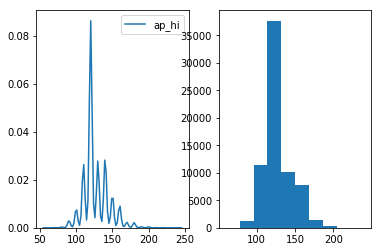

In [19]:
plt.subplot(1,2,1)
sns.kdeplot(df['ap_hi'])
plt.subplot(1,2,2)
plt.hist(df['ap_hi'])
plt.show()

In [20]:
df.loc[(df['ap_lo']>200) & (df['ap_lo']<2000)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1


In [21]:
df.loc[(df['ap_lo']>200) & (df['ap_lo']<2000), 'ap_lo'] = df.loc[(df['ap_lo']>200) & (df['ap_lo']<2000), 'ap_lo'] // 10

In [22]:
df.loc[df['ap_lo']>=2000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2381,3352,20994,2,186,105.0,140,10000,1,1,0,0,1,1
2985,4208,20398,1,168,78.0,140,8044,3,3,0,0,0,1
6653,9482,19528,1,162,69.0,130,9100,1,1,0,0,1,1
9165,13066,19078,1,165,71.0,120,8000,1,1,0,0,1,1
12086,17260,21466,2,169,78.0,130,9011,1,1,1,1,1,1
14308,20438,18381,1,160,70.0,160,7100,1,1,0,1,1,1
15990,22832,14508,2,179,70.0,120,8500,1,1,0,0,1,0
17738,25348,19573,1,151,57.0,140,8099,1,1,0,0,0,0
20882,29821,19121,1,155,81.0,160,8100,1,1,0,0,1,1
23230,33191,19932,2,170,70.0,112,5700,1,2,0,0,1,1


In [23]:
df.loc[df['ap_lo']>=2000, 'ap_lo'] = df.loc[df['ap_lo']>=2000, 'ap_lo'] // 100

In [24]:
df.loc[df['ap_lo']>=df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,19099,1,156,65.0,120,150,2,1,0,0,1,0
636,913,20457,2,169,68.0,70,110,1,1,0,0,1,0
2384,3356,23361,1,154,102.0,90,150,1,1,0,0,0,1
2990,4214,21957,2,182,90.0,80,140,3,3,0,0,1,1
3447,4880,19992,2,180,80.0,80,125,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66315,94673,22551,1,169,88.0,100,160,3,3,0,0,0,1
66657,95164,19498,2,160,81.0,80,120,3,3,1,1,1,1
67421,96271,23424,1,153,74.0,80,130,1,1,0,0,1,1
67470,96339,21193,2,172,57.0,80,120,1,1,1,0,1,1


In [25]:
indexes = df.loc[df['ap_lo']>=df['ap_hi']].index

for ind in indexes:
    _ = df.iloc[ind, 5]
    df.iloc[ind, 5] = df.iloc[ind, 6]
    df.iloc[ind, 6] = _

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [26]:
df.loc[df['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,22571,1,167,74.0,150,-70,1,1,0,0,1,1


In [27]:
df.loc[df['ap_lo']<0, 'ap_lo'] = df.loc[df['ap_lo']<0, 'ap_lo'] * -1

In [28]:
df.loc[df['ap_lo']<=10, 'ap_lo'] = df.loc[df['ap_lo']<=10, 'ap_lo'] * 10

In [29]:
df.loc[df['ap_lo']==0, 'ap_lo'] = df['ap_lo'].mode()[0]

In [30]:
df.loc[df['ap_lo']<20]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35140,50210,20877,1,146,55.0,130,10,1,1,0,0,0,0
56927,81260,18336,1,155,76.0,70,15,1,1,0,1,1,1


In [31]:
df.iloc[35140, 6] = 100
df.iloc[56927, 6] = 70
df.iloc[56927, 5] = 150

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


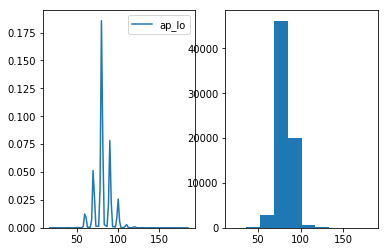

In [33]:
plt.subplot(1,2,1)
sns.kdeplot(df['ap_lo'])
plt.subplot(1,2,2)
plt.hist(df['ap_lo'])
plt.show()

In [34]:
df.loc[df['ap_lo']>df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


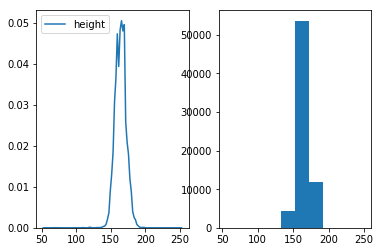

In [35]:
plt.subplot(1,2,1)
sns.kdeplot(df['height'])
plt.subplot(1,2,2)
plt.hist(df['height'])
plt.show()

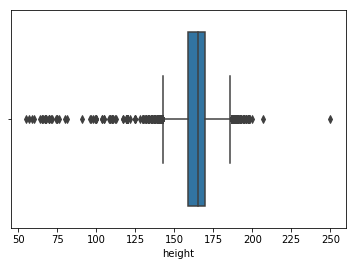

In [36]:
sns.boxplot(df['height'])

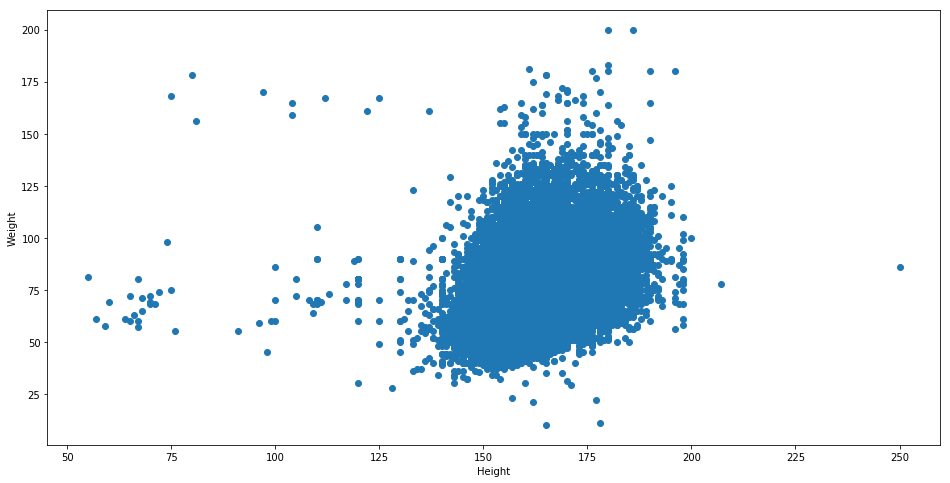

In [37]:
plt.figure(figsize=(16, 8))

plt.scatter(df.height, df.weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

В данных роста пациентов тоже много ошибок. Допустим что у пациетнов с ростом меньше 100 просто не дописали единичку, пациенты с аномально большим ростом - случайно добавили. Так же много пациентов с явно ошибочными данными по росту (рост меньше 130), но что с ними делать - не очень понятно. 

In [38]:
df.loc[df['height'] > 210, 'height'] = df.loc[df['height'] > 210, 'height'] - 100
df.loc[df['height'] < 100, 'height'] = df.loc[df['height'] < 100, 'height'] + 100

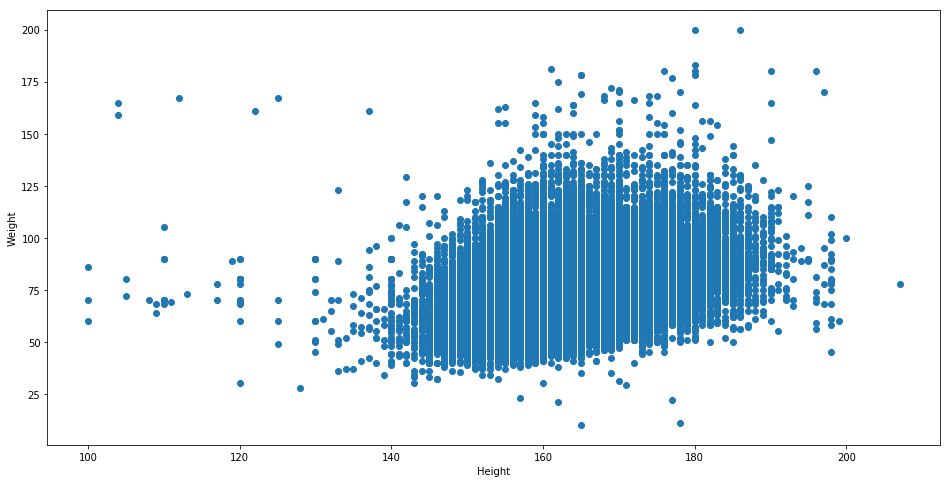

In [39]:
plt.figure(figsize=(16, 8))

plt.scatter(df.height, df.weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [40]:
df.loc[df['age'] < 12000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,8850,10878,1,175,59.0,120,80,1,1,0,0,1,0
22343,31922,10798,2,175,92.0,100,60,1,1,0,0,1,0
30666,43842,10859,1,159,59.0,120,80,1,1,0,0,1,0
55905,79749,10964,1,160,59.0,110,70,1,1,0,0,1,0


In [41]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [42]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.399229,74.205690,127.068243,81.572429,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,7.993305,14.395757,17.054212,9.792913,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,100.000000,10.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Добавим несколько новых признаков, таких как индекс массы тела (BMI), среднюю по давлению, разницу давлений.

In [43]:
df['bmi'] = df['weight'] / (df['height'] / 100 ) ** 2
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


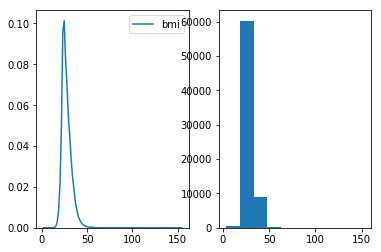

In [44]:
plt.subplot(1,2,1)
sns.kdeplot(df['bmi'])
plt.subplot(1,2,2)
plt.hist(df['bmi'])
plt.show()

In [45]:
df.loc[df['bmi'] > 70]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
6153,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1,108.169847
11230,16062,18307,1,110,90.0,120,80,1,1,0,0,1,0,74.380165
12435,17757,22077,1,137,161.0,150,100,2,1,0,0,0,1,85.779743
15366,21958,17405,1,125,167.0,180,90,1,2,0,0,1,1,106.880000
17074,24396,21259,1,100,86.0,110,70,1,1,0,0,1,1,86.000000
20028,28605,19777,1,112,167.0,180,120,1,1,0,1,1,0,133.131378
28897,41289,18961,1,110,105.0,140,90,2,1,0,0,1,1,86.776860
45358,64802,19834,1,104,159.0,200,100,3,1,0,0,0,1,147.004438
59625,85128,17643,1,104,165.0,120,80,1,1,0,0,1,0,152.551775
64787,92478,23476,1,105,80.0,130,90,1,1,0,0,1,1,72.562358


Как видим, индекс массы тела хорошо показывает нам аномалии в росте и весе пациентов. 

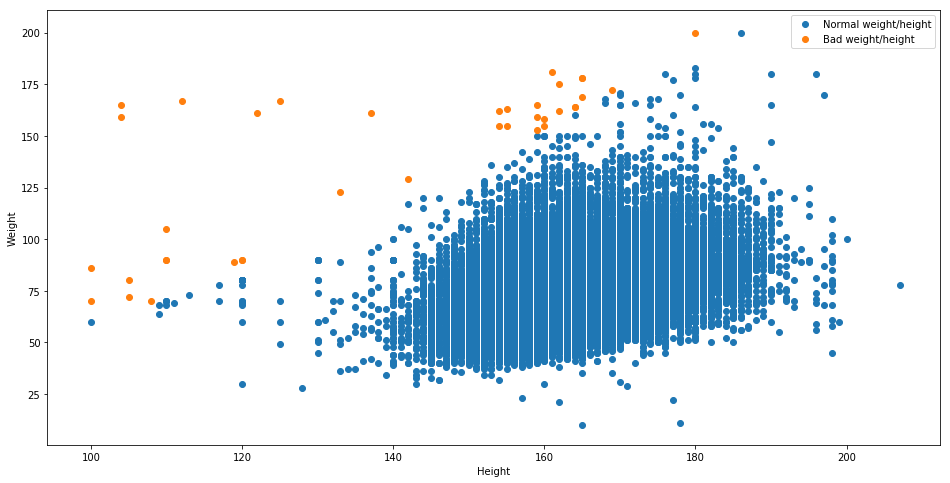

In [46]:
plt.figure(figsize=(16, 8))

plt.scatter(df.loc[df['bmi'] <= 60, 'height'], df.loc[df['bmi'] <= 60, 'weight'], label='Normal weight/height')
plt.scatter(df.loc[df['bmi'] > 60, 'height'], df.loc[df['bmi'] > 60, 'weight'], label='Bad weight/height')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

На основе данных о bmi можно классифицировать наших пациентов: 

В соответствии с рекомендациями ВОЗ разработана следующая интерпретация показателей BMI:

16 и менее:	Выраженный дефицит массы тела

16—18,5:	Недостаточная (дефицит) масса тела

18,5—25:	Норма

25—30:	    Избыточная масса тела (предожирение)

30—35:	    Ожирение

35—40:	    Ожирение резкое

40 и более:	Очень резкое ожирение

In [47]:
df['bmi_class'] = -1
df.loc[df['bmi'] <= 16, 'bmi_class'] = 0
df.loc[(df['bmi'] > 16) & (df['bmi'] <= 18.5), 'bmi_class'] = 1
df.loc[(df['bmi'] > 18.5) & (df['bmi'] <= 25), 'bmi_class'] = 2
df.loc[(df['bmi'] > 25) & (df['bmi'] <= 30), 'bmi_class'] = 3
df.loc[(df['bmi'] > 30) & (df['bmi'] <= 35), 'bmi_class'] = 4
df.loc[(df['bmi'] > 35) & (df['bmi'] <= 40), 'bmi_class'] = 5
df.loc[df['bmi'] > 40, 'bmi_class'] = 6

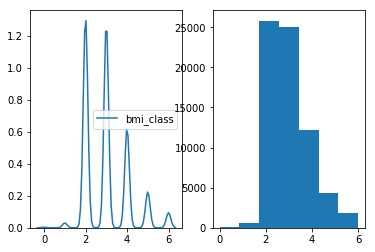

In [48]:
plt.subplot(1,2,1)
sns.kdeplot(df['bmi_class'])
plt.subplot(1,2,2)
plt.hist(df['bmi_class'], bins=7)
plt.show()

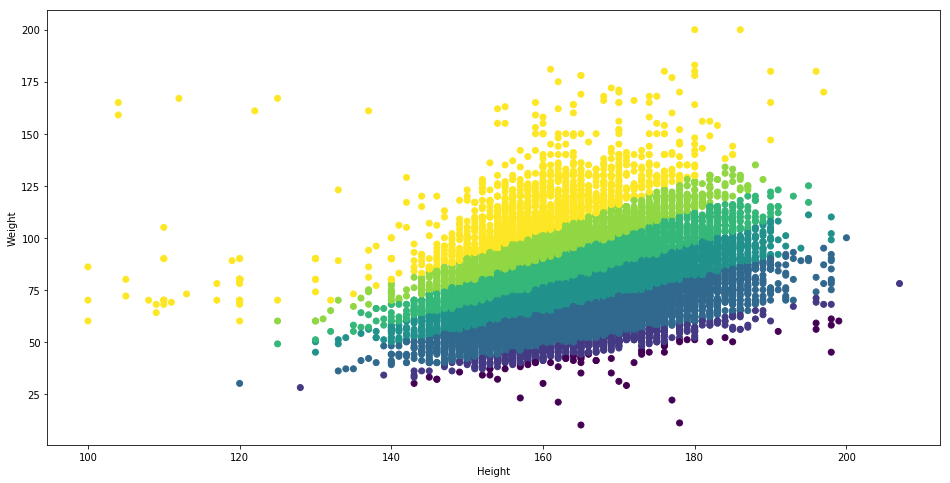

In [49]:
plt.figure(figsize=(16, 8))

plt.scatter(df.height, df.weight, c=df.bmi_class)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [50]:
df['ap_mean'] = (df['ap_hi'] + df['ap_lo']) / 2
df['ap_dif'] = df['ap_hi'] - df['ap_lo']

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,ap_mean,ap_dif
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.399229,74.205690,127.068243,81.572429,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.503683,2.990686,104.320336,45.495814
std,28851.302323,2467.251667,0.476838,7.993305,14.395757,17.054212,9.792913,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,5.379276,1.036085,12.579900,11.852387
min,0.000000,10798.000000,1.000000,100.000000,10.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000,50.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,2.000000,100.000000,40.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238,3.000000,100.000000,40.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.189591,4.000000,110.000000,50.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,152.551775,6.000000,190.000000,220.000000


In [51]:
cat_features = ['gender', 'smoke', 'alco', 'active', 'cholesterol', 'gluc', 'bmi_class']

In [52]:
columns = set(df.columns) - set(['id', 'cardio'])
columns

{'active',
 'age',
 'alco',
 'ap_dif',
 'ap_hi',
 'ap_lo',
 'ap_mean',
 'bmi',
 'bmi_class',
 'cholesterol',
 'gender',
 'gluc',
 'height',
 'smoke',
 'weight'}

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df[columns], df['cardio'], random_state=42)

In [54]:
X_train.head()

,cholesterol,ap_hi,ap_lo,smoke,age,weight,gender,bmi,bmi_class,ap_dif,active,alco,height,gluc,ap_mean
58774,1,120,80,0,19687,75.0,1,26.573129,3,40,1,0,168,1,100.0
7414,1,130,80,0,20602,62.0,1,22.499637,2,50,1,0,166,1,105.0
63662,1,110,70,0,23337,100.0,1,41.091387,6,40,1,0,156,1,90.0
54551,1,110,70,0,14673,60.0,1,22.038567,2,40,1,0,165,1,90.0
50995,2,90,60,0,18250,56.0,1,21.077195,2,30,1,0,163,1,75.0


In [55]:
from catboost import CatBoostClassifier

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {
    'iterations': np.linspace(500, 1500, 5),
    'learning_rate': np.linspace(0.005, 0.015, 5)
          }

classifier = CatBoostClassifier(cat_features=cat_features,
                                verbose=False,
                                custom_metric = ['Logloss', 'AUC'])

clf = GridSearchCV(classifier, params, n_jobs=-1, cv=5, scoring='roc_auc', verbose=2)
clf.fit(X_train, y_train)
    
print(f'Best params: {clf.best_params_}, best score: {clf.best_score_}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 22.8min finished


Best params: {'iterations': 1000.0, 'learning_rate': 0.015}, best score: 0.8034623642028199


In [58]:
model = CatBoostClassifier(**clf.best_params_,
                           cat_features=cat_features,
                           loss_function='Logloss',
                           eval_metric='AUC',
                           verbose=False)

model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [59]:
import shap

shap.initjs()

In [77]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

На этом примере можно увидеть, что верхнее давление = 120 значительно уменьшает риск сердечного приступа, так же как и значение холестерина = 1. Среднее давление и спортивный образ жизни средне снижают вероятность. Мы видим, что большой вес и явное ожирение увеличивают вероятность в данном конкретном примере. 

In [78]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

В этом примере мы видим, что повышенное давление, возраст и разница верхнего и нижнего давлений сильно увеличивают риск. В этом примере только уровень холестерина = 1 очень незначительно снижает риск.

In [79]:
ind_start = 120
n = 100

shap.force_plot(explainer.expected_value, shap_values[ind_start:ind_start + n,:], X_test.iloc[ind_start:ind_start + n,:])

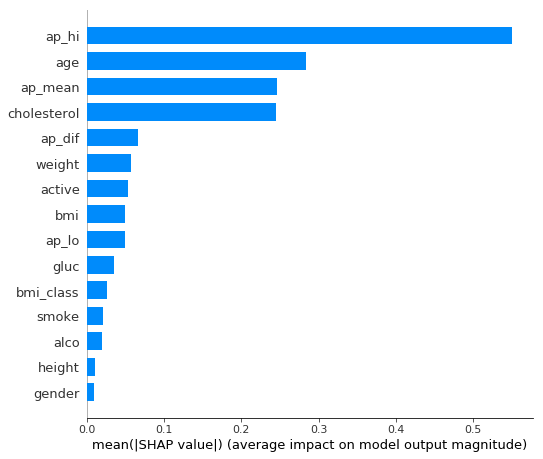

In [62]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

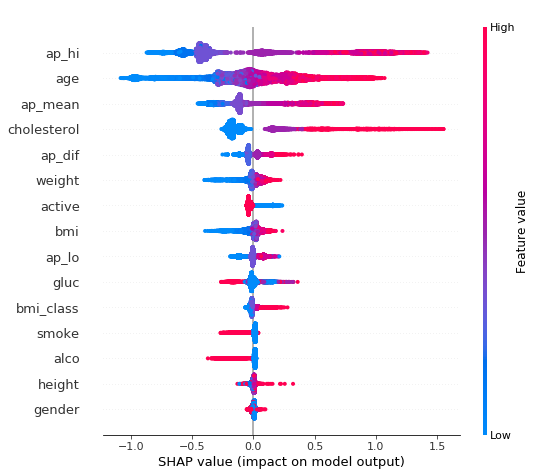

In [63]:
shap.summary_plot(shap_values, X_test)

Как видим выше, большое влияние на вероятность сердечного приступа у пациентов оказывают: высокий верхний показатель давления, большое значение возраста, высокие показатели холестерина. Что интересно, курение и алкоголь в основном снижают вероятность сердечного приступа О_о. 

In [64]:
X_train_p = X_train.copy()
X_train_p['proba'] = model.predict_proba(X_train)[:, 1]
X_train_top_risk = X_train_p.sort_values(by=['proba'], ascending=False).head(5000)

X_train_top_risk.head()

,cholesterol,ap_hi,ap_lo,smoke,age,weight,gender,bmi,bmi_class,ap_dif,active,alco,height,gluc,ap_mean,proba
36860,2,160,90,1,14508,130.0,2,39.246468,5,70,0,0,182,1,125.0,0.934961
38771,3,155,100,1,22548,55.0,1,23.495237,2,55,0,0,153,1,127.5,0.929130
59902,3,180,100,1,21988,54.0,2,22.769438,2,80,1,1,154,3,140.0,0.926452
67810,3,150,90,0,23414,40.0,1,18.510806,2,60,1,0,147,1,120.0,0.924907
68475,3,150,90,1,23374,53.0,2,19.705532,2,60,1,0,164,1,120.0,0.920706


In [65]:
shap_values = explainer.shap_values(X_train_top_risk)

shap.force_plot(explainer.expected_value, shap_values[:100], X_train_top_risk.iloc[:100, :])

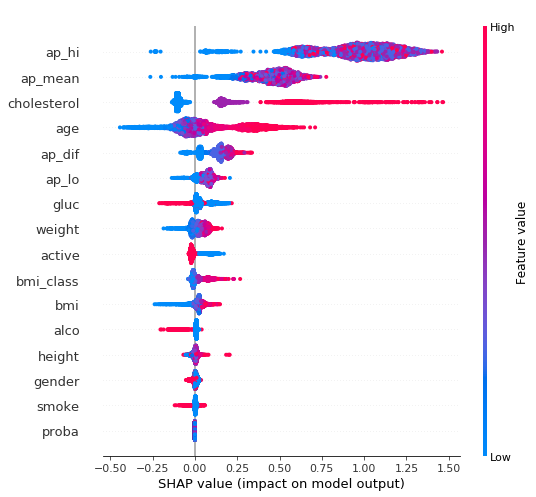

In [66]:
shap.summary_plot(shap_values, X_train_top_risk)

Тут может показаться, что любой верхний порог давления повышает вероятность сердечного приступа, но не стоит забывать, что мы рассматриваем группу наиболее подверженных риску (по мнению нашей модели), поэтому среднее значение давления в этой группе будет сильно отличаться от средней по всем наблидениям. 

In [67]:
X_train_top_risk.ap_hi.mean()

157.3004

In [68]:
X_train.ap_hi.mean()

127.01809523809524

In [69]:
preds = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
    
ix = np.argmax(fscore)
    
print(f'fscore: {fscore[ix]} at threshold: {thresholds[ix]}')

fscore: 0.7479506070353844 at threshold: 0.37249787281287855


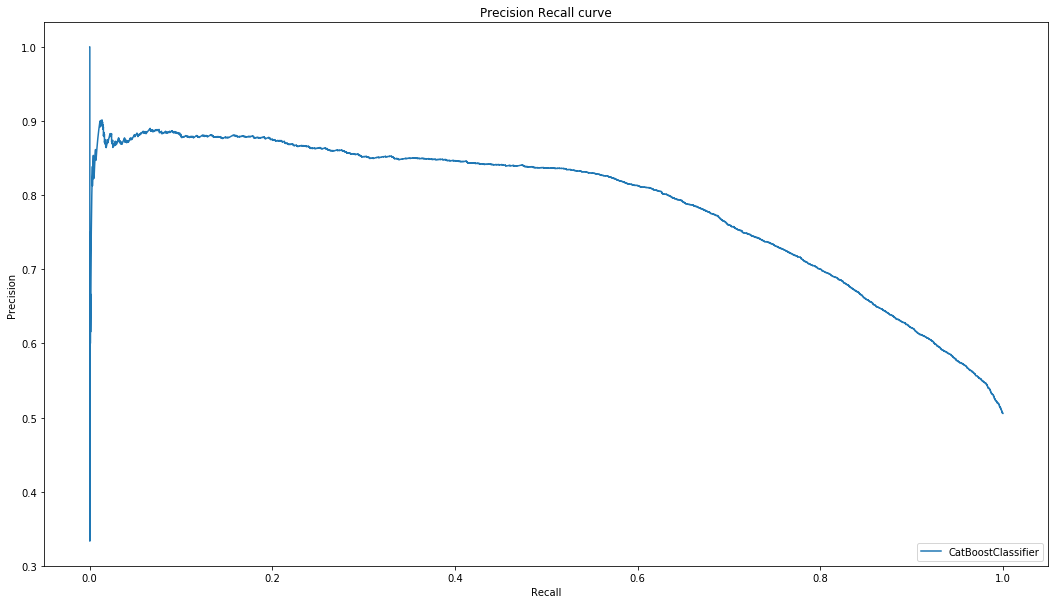

In [70]:
plt.figure(figsize=(18,10))

precision, recall, thresholds = precision_recall_curve(y_test, preds)
plt.plot(recall, precision, label = f'CatBoostClassifier')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend(loc=4)
plt.show()

In [71]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5434 3254]
 [1605 7207]]


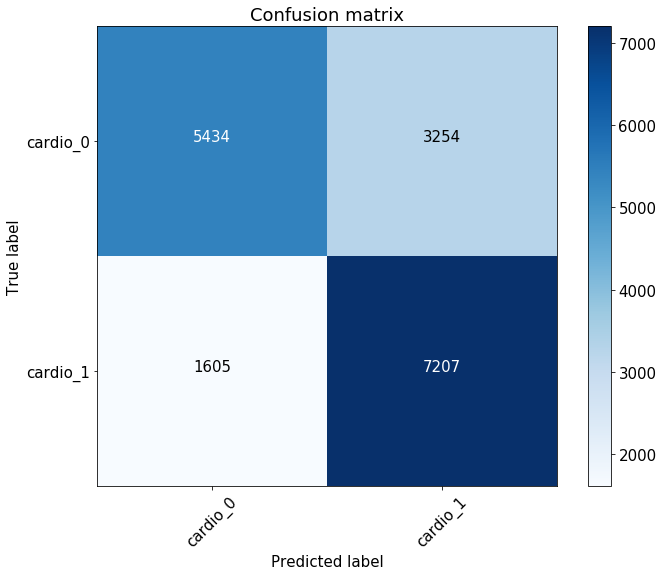

In [72]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.show()